# Oversampling

## Tujuan:

1. Menganalisa distribusi kelas dalam dataset iris
2. Menampilkan teknik SMOTE untuk menyeimbangkan data
3. Memvisualisasikan hasil sebelum dan sesudah SMOTE
4. Membandingkan distribusi menggunakan PCA

## Load dataset from database

Pastikan kamu sudah install:

- `mysql-connector-python` (untuk MySQL)
- `psycopg2` atau `sqlalchemy` (untuk PostgreSQL)
- `pandas`

In [1]:
import pandas as pd
from sqlalchemy import create_engine

USER = "root"
PASSWORD = ""
HOST = "localhost"
PORT = 3306
DBNAME = "iris_dataset"

# Buat koneksi ke MySQL (pakai driver PyMySQL)
engine = create_engine(f"mysql+pymysql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}")

# Query ke database MySQL
query = "SELECT * FROM iris_1;"
df = pd.read_sql(query, engine)

print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0  36            5.0           3.2            1.2           0.2  Iris-setosa
1  37            5.5           3.5            1.3           0.2  Iris-setosa
2  38            4.9           3.1            1.5           0.1  Iris-setosa
3  39            4.4           3.0            1.3           0.2  Iris-setosa
4  40            5.1           3.4            1.5           0.2  Iris-setosa


## Scatter Plot PCA iris

explained variance ratio (first two components): [0.8962252 0.0647599]


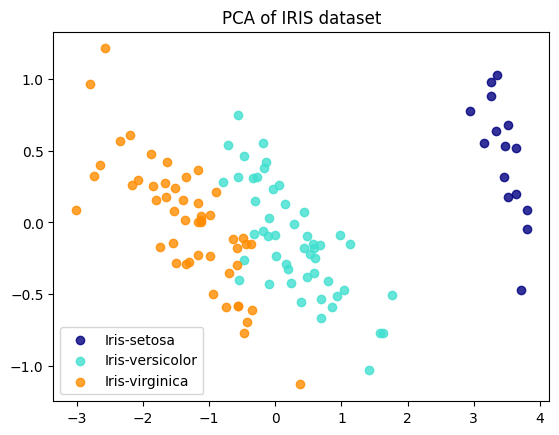

In [2]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

x = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
y = LabelEncoder().fit_transform(df["Species"])
target_names = df["Species"].unique()

# PCA
pca = PCA(n_components=2)
X_r = pca.fit(x).transform(x)

print("explained variance ratio (first two components): %s"
      % str(pca.explained_variance_ratio_))

# Visualisasi PCA
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
for color, i, target_name in zip(colors, range(len(target_names)), target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, label=target_name)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.show()

## Oversampling using imbalanced with SMOTE

Distribusi sebelum SMOTE : {0: 15, 1: 50, 2: 50}
Distribusi sesudah SMOTE : {0: 50, 1: 50, 2: 50}


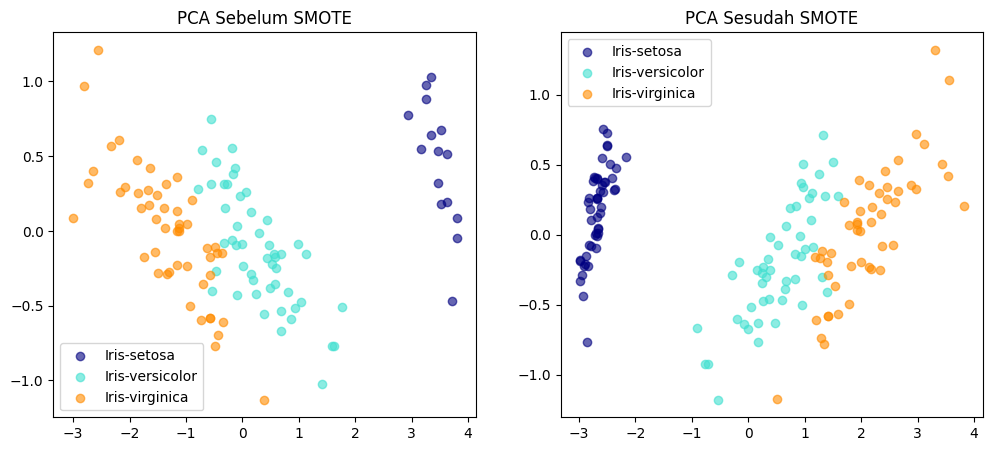

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import numpy as np

# Pisahkan fitur & target
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
y = LabelEncoder().fit_transform(df["Species"])
target_names = df["Species"].unique()

# Oversampling dengan SMOTE (imbalanced-learn)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Distribusi sebelum SMOTE :", dict(zip(*np.unique(y, return_counts=True))))
print("Distribusi sesudah SMOTE :", dict(zip(*np.unique(y_res, return_counts=True))))

# PCA sebelum SMOTE
pca = PCA(n_components=2)
X_r_before = pca.fit(X).transform(X)

# PCA sesudah SMOTE
X_r_after = pca.fit(X_res).transform(X_res)

# Visualisasi sebelum dan sesudah SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
colors = ["navy", "turquoise", "darkorange"]

# Plot sebelum SMOTE
for color, i, target_name in zip(colors, range(len(target_names)), target_names):
    axes[0].scatter(X_r_before[y == i, 0], X_r_before[y == i, 1],
                    alpha=0.6, color=color, label=target_name)
axes[0].set_title("PCA Sebelum SMOTE")
axes[0].legend()

# Plot sesudah SMOTE
for color, i, target_name in zip(colors, range(len(target_names)), target_names):
    axes[1].scatter(X_r_after[y_res == i, 0], X_r_after[y_res == i, 1],
                    alpha=0.6, color=color, label=target_name)
axes[1].set_title("PCA Sesudah SMOTE")
axes[1].legend()

plt.show()

## Classification

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Pisahkan fitur & target
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
y = LabelEncoder().fit_transform(df["Species"])
target_names = df["Species"].unique()

# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Distribusi sebelum SMOTE :", dict(zip(*np.unique(y, return_counts=True))))
print("Distribusi sesudah SMOTE :", dict(zip(*np.unique(y_res, return_counts=True))))

# ======================================================
# 1. Naive Bayes pada data sebelum SMOTE
# ======================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
nb_before = GaussianNB()
nb_before.fit(X_train, y_train)
y_pred_before = nb_before.predict(X_test)

print("\n=== Hasil Naive Bayes Sebelum SMOTE ===")
print("Akurasi:", accuracy_score(y_test, y_pred_before))
print(classification_report(y_test, y_pred_before, target_names=target_names))

# ======================================================
# 2. Naive Bayes pada data sesudah SMOTE
# ======================================================
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)
nb_after = GaussianNB()
nb_after.fit(X_train_res, y_train_res)
y_pred_after = nb_after.predict(X_test_res)

print("\n=== Hasil Naive Bayes Sesudah SMOTE ===")
print("Akurasi:", accuracy_score(y_test_res, y_pred_after))
print(classification_report(y_test_res, y_pred_after, target_names=target_names))


Distribusi sebelum SMOTE : {0: 15, 1: 50, 2: 50}
Distribusi sesudah SMOTE : {0: 50, 1: 50, 2: 50}

=== Hasil Naive Bayes Sebelum SMOTE ===
Akurasi: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         3
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        23
      macro avg       1.00      1.00      1.00        23
   weighted avg       1.00      1.00      1.00        23


=== Hasil Naive Bayes Sesudah SMOTE ===
Akurasi: 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0

## Bagging Classifier

Distribusi sebelum SMOTE : {0: 15, 1: 50, 2: 50}
Distribusi sesudah SMOTE : {0: 50, 1: 50, 2: 50}

=== Hasil Bagging Sebelum SMOTE ===
Akurasi: 0.9142857142857143
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         5
Iris-versicolor       0.93      0.87      0.90        15
 Iris-virginica       0.88      0.93      0.90        15

       accuracy                           0.91        35
      macro avg       0.93      0.93      0.93        35
   weighted avg       0.92      0.91      0.91        35



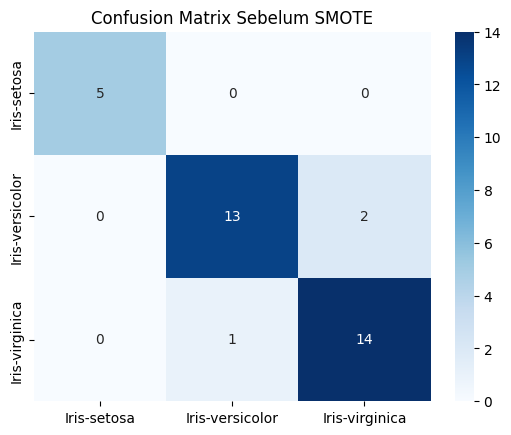


=== Hasil Bagging Sesudah SMOTE ===
Akurasi: 0.9333333333333333
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      0.93      0.90        15
 Iris-virginica       0.93      0.87      0.90        15

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



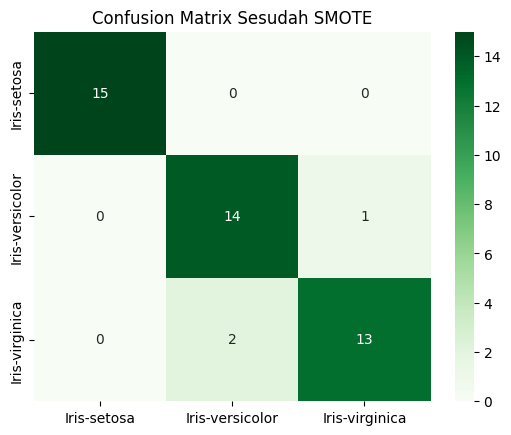

In [21]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

# Pisahkan fitur & target
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
y = LabelEncoder().fit_transform(df["Species"])
target_names = df["Species"].unique()

# Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Distribusi sebelum SMOTE :", dict(zip(*np.unique(y, return_counts=True))))
print("Distribusi sesudah SMOTE :", dict(zip(*np.unique(y_res, return_counts=True))))

# ======================================================
# 1. Bagging Classifier pada data sebelum SMOTE
# ======================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

bag_before = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bag_before.fit(X_train, y_train)
y_pred_before = bag_before.predict(X_test)

print("\n=== Hasil Bagging Sebelum SMOTE ===")
print("Akurasi:", accuracy_score(y_test, y_pred_before))
print(classification_report(y_test, y_pred_before, target_names=target_names))

# Confusion matrix
cm_before = confusion_matrix(y_test, y_pred_before)
sns.heatmap(cm_before, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix Sebelum SMOTE")
plt.show()

# ======================================================
# 2. Bagging Classifier pada data sesudah SMOTE
# ======================================================
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

bag_after = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bag_after.fit(X_train_res, y_train_res)
y_pred_after = bag_after.predict(X_test_res)

print("\n=== Hasil Bagging Sesudah SMOTE ===")
print("Akurasi:", accuracy_score(y_test_res, y_pred_after))
print(classification_report(y_test_res, y_pred_after, target_names=target_names))

# Confusion matrix
cm_after = confusion_matrix(y_test_res, y_pred_after)
sns.heatmap(cm_after, annot=True, fmt="d", cmap="Greens",
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix Sesudah SMOTE")
plt.show()
